# Inhaltsverzeichnis
- [Simple LDA](https://github.com/NiklasElsaesser/bug-free-fishstick/blob/main/Simple_LDA.ipynb) (Separates Notebook)
- [Improved LDA](https://github.com/NiklasElsaesser/bug-free-fishstick/blob/main/Improved_LDA.ipynb) (Separates Notebook)
- [Benchmarking & Visualisierung](#benchmarking--visualisierung)
  - [Einrichtung](#einrichtung)
  - [Vergleich der Zuordnung](#vergleich-der-kategorie-ermittlung)
  - [Vergleich der Laufzeit](#laufzeit-vergleich)
  - [Herausforderungen & Verbesserungen](#herausforderungen--verbesserungen)
- [Literaturverzeichnis](#literaturverzeichnis)

# Benchmarking & Visualisierung
Im Rahmen dieser Untersuchung werden die Ergebnisse der beiden LDA-Versionen (einfach und verbessert) hinsichtlich folgender Parameter analysiert:
* Vergleich der PyLDAvis-Visualisierung
* Vergleich der Kategorien, die übereinstimmen
* Vergleich der Übereinstimmungsrate
* Vergleich der Laufzeit
* Vergleich der Kohärenz pro Modell

Im Folgenden werden die Projekte in den jeweiligen Kapiteln zusammengefasst.
* Vergleichende Gegenüberstellung beider Methoden
* Herausforderungen und Optimierungen
* Schlussfolgerung

## Einrichtung
Installation der erforderlichen Bibliotheken sowie die Einbindung der relevanten Funktionen.

In [84]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [85]:
import pyLDAvis
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np

Im Rahmen der Ausführung in Google Colab ist es erforderlich, die nachfolgenden beiden Blöcke unbeaufsichtigt auszuführen.

In [86]:
#code necessary when running in colab
#from google.colab import drive
#drive.mount('/content/drive')

Im Folgenden werden die in einem der beiden LDAs vorliegenden Daten für eine spätere Verwendung importiert.

In [87]:
# general data
news_art = pd.read_json('News_Category_Dataset_v3.json', lines=True)

# data from simple lda
LDAV_run_details = pd.read_csv('data/vanilla_lda_data.csv')
#LDAV_lda_scores = pd.read_csv('data/vanilla-lda_scores.csv')
LDAV_matched_categories = pd.read_csv('data/vanilla-matched_categories.csv')
LDAV_not_matched_categories = pd.read_csv('data/vanilla-no_match_categories.csv')

#data from improved ld
LDAP_run_details = pd.read_csv('visuals/improved_lda_run_details_with_coherence.csv')
LDAP_lda_scores = pd.read_csv('data/improved_lda_lda_scores.csv')
LDAP_matched_categories = pd.read_csv('data/improved_lda-matched_categories.csv')
LDAP_not_matched_categories = pd.read_csv('data/improved_lda-no_match_categories.csv')

# data from improved lda small
sLDAP_run_details = pd.read_csv('data/improved_lda_small_run_details_with_coherence.csv')
sLDAP_lda_scores = pd.read_csv('data/improved_lda_small_lda_scores.csv')
sLDAP_matched_categories = pd.read_csv('data/improved_lda_small-matched_categories.csv')
sLDAP_not_matched_categories = pd.read_csv('data/improved_lda_small-no_match_categories.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/improved_lda_small_run_details_with_coherence.csv'

## Vergleich der Kategorie-Ermittlung
Der Vergleich erfolgt lediglich zwischen dem vorhergesagten Kategoriewert und dem bereits definierten Wert aus dem ursprünglichen Dataset, wobei die *short_description* und die *headline* berücksichtigt werden.

Eine höheren Anzahl an vorhergesagten Kategorien und eine höhere Kompetabilität führen zu einem besseren Ergebnis.

### PyLDAVis
Die resultierenden LDA-Parameter werden zunächst mithilfe der interaktiven Pyldavis-Bibliothek visualisiert, die sich in besonderem Maße für die LDA-Themenmodellierung eignet.

Die als Kreise dargestellten Themen $T$ werden hinsichtlich ihrer relativen Häufigkeit in dem Dokumenten-Corpus $D$ abgebildet. Die Größe der Kreise spiegelt somit die jeweilige Relevanz wider. Die Position der Kreise im Diagramm gibt Aufschluss über die Ähnlichkeit oder Differenzierung der einzelnen Themen zueinander. Durch Selektion eines Kreises werden die für das jeweilige Thema relevanten Hauptwörter angezeigt, was zu einer vertieften Einsicht in die Relevanz der Wörter in Bezug auf das Thema führt. 

Zudem ist eine Einschätzung derjenigen Wörter möglich, die für das Modell von Bedeutung sind, sowie eine Einschätzung der Wichtigkeit und Einflussnahme einzelner Wörter auf die Themen.

PyLDAvis für den **simplen** LDA

In [58]:
with open('visuals/vanilla_lda.pkl', 'rb') as f:
    vanilla_lda = pickle.load(f)

pyLDAvis.display(vanilla_lda) 


PyLDAvis für den **verbesserten** LDA

In [59]:
with open('visuals/improved_lda.pkl', 'rb') as f:
    improved_lda = pickle.load(f)
    
pyLDAvis.display(improved_lda)

PyLDAvis für den **verbesserten** LDA *small*

In [ ]:
with open('visuals/improved_lda_small.pkl', 'rb') as f:
    improved_lda_small = pickle.load(f)
    
pyLDAvis.display(improved_lda_small)

### Übereinstimmungs Vergleich
Im Folgenden wird die vorliegende Kategorie mit der prognostizierten Kategorie jedes LDA verglichen, wobei zusätzlich die jeweilige Vorhersage in Prozent angegeben wird. Dies dient der besseren Verständlichkeit.

Für eine weiterführende Analyse werden zudem die nicht zugeordneten Kategorien aufgeführt.

Gesamtzahl der Kategorien $T$ im Datensatz.

In [60]:
# Calculating the percentage of each category
category_counts = news_art['category'].value_counts(normalize=True) * 100
category_counts = category_counts.reset_index()
category_counts.columns = ['category', 'percentage']

category_counts

,category,percentage
0,POLITICS,16.991605
1,WELLNESS,8.564529
2,ENTERTAINMENT,8.286283
3,TRAVEL,4.724928
4,STYLE & BEAUTY,4.683883
5,PARENTING,4.195641
6,HEALTHY LIVING,3.194815
7,QUEER VOICES,3.029204
8,FOOD & DRINK,3.025863
9,BUSINESS,2.859775


Die Verteilung der Daten pro Kategorie in Prozent

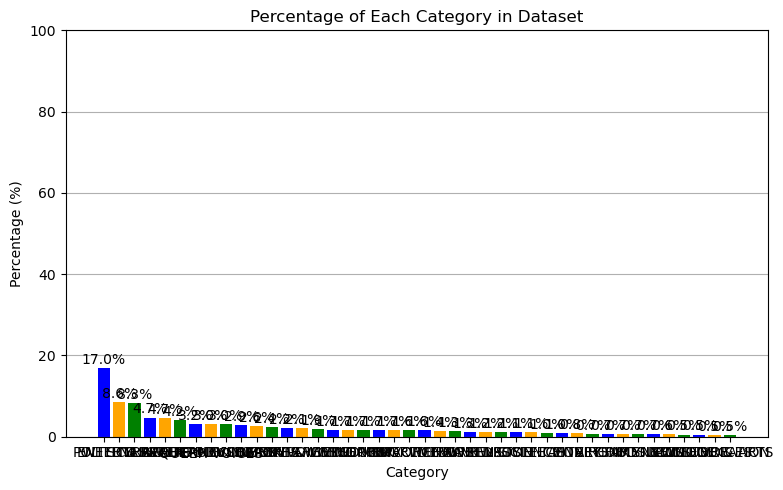

In [61]:
plt.figure(figsize=(8, 5))
plt.bar(category_counts['category'], category_counts['percentage'], color=['blue', 'orange', 'green'])
plt.xlabel('Category')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Each Category in Dataset')
plt.ylim(0, 100)
plt.grid(axis='y')

# Adding percentage labels on top of the bars
for index, value in enumerate(category_counts['percentage']):
    plt.text(index, value + 1, f"{value:.1f}%", ha='center')

plt.tight_layout()
plt.show()

In [62]:
matched_comparison = pd.merge(
    LDAV_matched_categories, LDAP_matched_categories,
    on='category', suffixes=('Vanilla_LDA', 'Improved_LDA')
)
matched_comparison.head()

,category,match_countVanilla_LDA,total_countVanilla_LDA,match_percentageVanilla_LDA,match_countImproved_LDA,total_countImproved_LDA,match_percentageImproved_LDA
0,PARENTING,17,8791,0.193380,24,8791,0.273006
1,GREEN,2,2622,0.076278,58,2622,2.212052
2,CRIME,2,3562,0.056148,259,3562,7.271196
3,WEDDINGS,2,3653,0.054750,44,3653,1.204489
4,STYLE & BEAUTY,3,9814,0.030569,438,9814,4.463012


In [63]:
matched_comparison_index = pd.merge(
    LDAV_matched_categories, LDAP_matched_categories,
    on='category', suffixes=('Vanilla_LDA', 'Improved_LDA')
)
matched_comparison_index.head()

,category,match_countVanilla_LDA,total_countVanilla_LDA,match_percentageVanilla_LDA,match_countImproved_LDA,total_countImproved_LDA,match_percentageImproved_LDA
0,PARENTING,17,8791,0.193380,24,8791,0.273006
1,GREEN,2,2622,0.076278,58,2622,2.212052
2,CRIME,2,3562,0.056148,259,3562,7.271196
3,WEDDINGS,2,3653,0.054750,44,3653,1.204489
4,STYLE & BEAUTY,3,9814,0.030569,438,9814,4.463012


In [64]:
# Merge the matched categories from both notebooks on 'category' for comparison
#matched_comparison = pd.merge(
#    LDAV_matched_categories, LDAP_matched_categories,
#    on='category', suffixes=('_Vanilla_LDA', '_Improved_LDA')
#)

matched_comparison = pd.merge(
    LDAV_matched_categories, sLDAP_matched_categories,
    on='category', suffixes=('_Vanilla_LDA', '_Improved_LDA')
)

# Compare match percentage in both notebooks
matched_comparison['match_percentage_diff'] = (
    matched_comparison['match_percentage_Vanilla_LDA'] -
    matched_comparison['match_percentage_Improved_LDA']
)

# Display the differences in match percentages
matched_comparison_index_df = matched_comparison[['category', 'match_percentage_Vanilla_LDA', 'match_percentage_Improved_LDA', 'match_percentage_diff']]

# Merge the no-match categories from both notebooks on 'category'
no_match_comparison = pd.merge(
    LDAV_not_matched_categories, LDAP_not_matched_categories,
    on='category', suffixes=('_Vanilla_LDA', '_Improved_LDA'),
    how='outer'
)

matched_comparison.to_csv('data/combined_matched_comparison.csv', index=False)
no_match_comparison.to_csv('data/combined_no_match_comparison.csv', index=False)


In [65]:
matched_comparison.head(10)

,category,match_count_Vanilla_LDA,total_count_Vanilla_LDA,match_percentage_Vanilla_LDA,match_count_Improved_LDA,total_count_Improved_LDA,match_percentage_Improved_LDA,match_percentage_diff
0,PARENTING,17,8791,0.193380,24,8791,0.273006,-0.079627
1,GREEN,2,2622,0.076278,58,2622,2.212052,-2.135774
2,CRIME,2,3562,0.056148,259,3562,7.271196,-7.215048
3,WEDDINGS,2,3653,0.054750,44,3653,1.204489,-1.149740
4,STYLE & BEAUTY,3,9814,0.030569,438,9814,4.463012,-4.432443
5,WELLNESS,3,17945,0.016718,54,17945,0.300919,-0.284202
6,FOOD & DRINK,1,6340,0.015773,65,6340,1.025237,-1.009464
7,ENTERTAINMENT,2,17361,0.011520,529,17361,3.047060,-3.035539
8,TRAVEL,1,9900,0.010101,139,9900,1.404040,-1.393939
9,POLITICS,2,35601,0.005618,34840,35601,97.862420,-97.856802


In [66]:
no_match_comparison.head(10)

,category,match_count_Vanilla_LDA,total_count_Vanilla_LDA,match_percentage_Vanilla_LDA,match_count_Improved_LDA,total_count_Improved_LDA,match_percentage_Improved_LDA
0,ARTS,0.0,1509.0,0.0,0.0,1509.0,0.0
1,ARTS & CULTURE,0.0,1339.0,0.0,0.0,1339.0,0.0
2,BLACK VOICES,NaN,NaN,NaN,0.0,4583.0,0.0
3,BUSINESS,NaN,NaN,NaN,0.0,5991.0,0.0
4,COLLEGE,0.0,1144.0,0.0,0.0,1144.0,0.0
5,COMEDY,NaN,NaN,NaN,0.0,5398.0,0.0
6,CULTURE & ARTS,0.0,1074.0,0.0,0.0,1074.0,0.0
7,DIVORCE,NaN,NaN,NaN,0.0,3426.0,0.0
8,EDUCATION,0.0,1014.0,0.0,NaN,NaN,NaN
9,ENVIRONMENT,NaN,NaN,NaN,0.0,1444.0,0.0


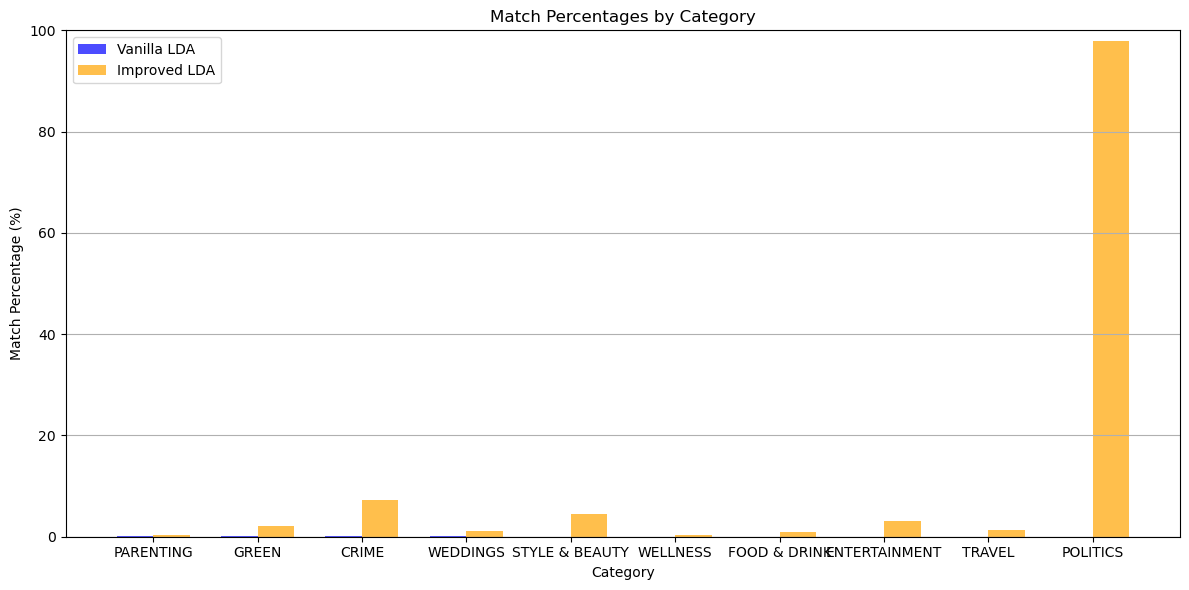

In [67]:
# Set the category as the x-axis labels
categories = matched_comparison['category']

# Prepare the data for plotting (only the match percentages)
vanilla_lda = matched_comparison['match_percentage_Vanilla_LDA']
improved_lda = matched_comparison['match_percentage_Improved_LDA']

# Plotting
plt.figure(figsize=(12, 6))

# Bar width
bar_width = 0.35

# Create an index for the x-axis
x = range(len(categories))

# Plotting the bars
plt.bar(x, vanilla_lda, width=bar_width, label='Vanilla LDA', color='blue', alpha=0.7)
plt.bar([p + bar_width for p in x], improved_lda, width=bar_width, label='Improved LDA', color='orange', alpha=0.7)

# Adding labels and title
plt.title('Match Percentages by Category')
plt.xlabel('Category')
plt.ylabel('Match Percentage (%)')
plt.xticks([p + bar_width / 2 for p in x], categories)  # Set x-ticks to be in the middle of the bars
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100 percent
plt.axhline(0, color='grey', linewidth=0.8)
plt.grid(axis='y')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

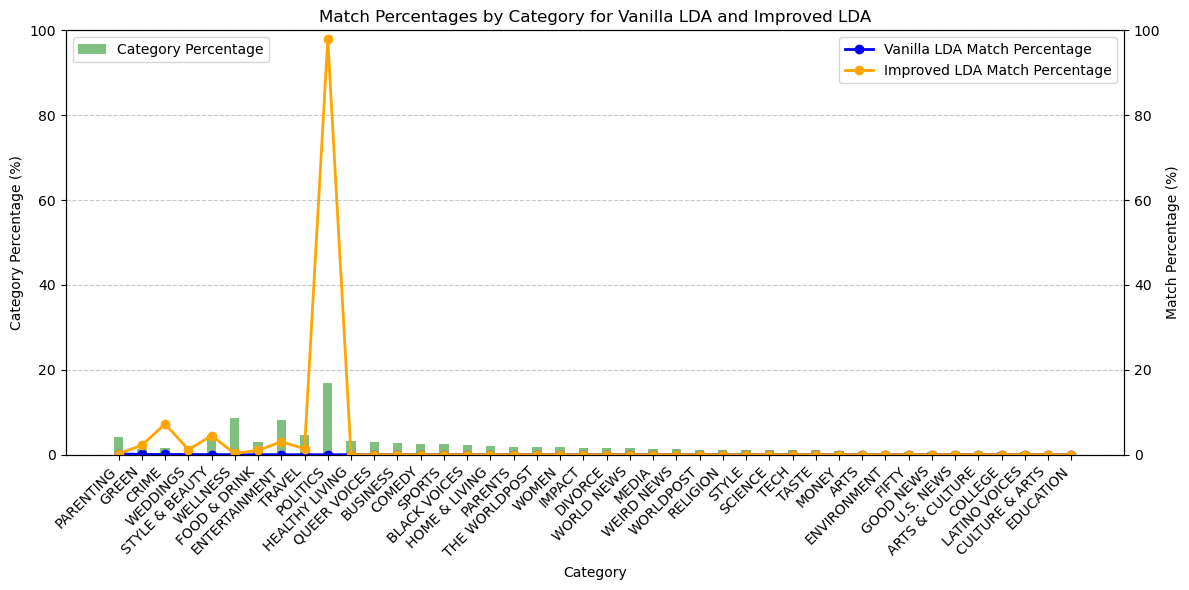

In [68]:
# Merge to ensure all categories are included
merged_data = category_counts.merge(
    matched_comparison,
    on='category',
    how='left'  # Keep all categories from category_counts
)

# Sort the merged DataFrame by match percentage of Vanilla LDA in descending order
merged_data_sorted = merged_data.sort_values(by='match_percentage_Vanilla_LDA', ascending=False)

# Prepare the data for plotting
categories_sorted = merged_data_sorted['category']
total_percentages_vanilla = merged_data_sorted['match_percentage_Vanilla_LDA'].fillna(0)  # Replace NaN with 0
total_percentages_improved = merged_data_sorted['match_percentage_Improved_LDA'].fillna(0)  # Replace NaN with 0
category_percentages = merged_data_sorted['percentage']

# Create figure for combined plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar width
bar_width = 0.4
x = np.arange(len(categories_sorted))

# Plotting category percentages as bars
ax1.bar(x, category_percentages, width=bar_width, label='Category Percentage', color='green', alpha=0.5)

# Plotting match percentages as lines
ax2 = ax1.twinx()
ax2.plot(x, total_percentages_vanilla, marker='o', label='Vanilla LDA Match Percentage', color='blue', linewidth=2, linestyle='-', markersize=6)
ax2.plot(x, total_percentages_improved, marker='o', label='Improved LDA Match Percentage', color='orange', linewidth=2, linestyle='-', markersize=6)

# Adding labels and title
ax1.set_title('Match Percentages by Category for Vanilla LDA and Improved LDA')
ax1.set_xlabel('Category')
ax1.set_ylabel('Category Percentage (%)')
ax2.set_ylabel('Match Percentage (%)')

# Set x-ticks to show category names
ax1.set_xticks(x)
ax1.set_xticklabels(categories_sorted, rotation=45, ha='right')  # Rotate for better readability

# Adding grid and limits
ax1.set_ylim(0, 100)
ax2.set_ylim(0, 100)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

### Wieviel wurde richtig erkannt?
Wie im obigen plot visualisiert, gibt es unterschiede der Ergebnisse zwischen beiden LDA Versionen (simple und improved). Die Version XX hat dabei mehr Kategorien mit einer höheren Wahrscheinlichkeit erkannt. Dem entschprechend ist der Aufwand für die Implementierung der Methode für die Version XX das Ergbenis Wert.

Kategorie XX wurde von beiden zuverlässig Erkannt (Anzahl), was vermutlich an XX liegt. Die Kategorien welche in weniger als 3 $%$ der Kategorie Werten vorkommen wurden von beiden Versionen nicht erkannt, dieser Umstand ist vermutlich der Tatsache geschuldet dass die Themen global gesehen unterrepresentiert sind.

Das Thema XX wurde nur ca. XX **(ermitteln wieviele Kategorien als prozent erkannt wurden)** Prozent der Categorien von Version XX richtig erkannt, und dann auch nur zwischen XX - XX Prozent. Für Version sieht die Verteilung wie folgt aus:

**Letztes großes Comparison Vis beschreiben**

## Laufzeit Vergleich
Des Weiteren ist eine Gegenüberstellung des Laufs mit seiner Laufzeit sowie des erzielten Kohärenzscores beider Versionen von entscheidender Bedeutung. Dabei gilt, dass ein höherer Kohärenzscore eine höhere Qualität der berechneten Themen widerspiegelt und somit als besser zu bewerten ist.

In [69]:
df_notebook1 = pd.read_csv('data/DUMMY-run_details_with_coherence.csv')
df_notebook2 = pd.read_csv('data/VSC5_run_details_with_coherence.csv')

merged_df = pd.merge(LDAV_run_details, LDAP_run_details[['Run', 'Duration (minutes)', 'Coherence Score']],
                     on='Run', suffixes=(' vanilla', ' improved'), how='outer')

print("\nMerged DataFrame:")
merged_df.head()


Merged DataFrame:


,Run,Duration (minutes) vanilla,Coherence Score vanilla,Duration (minutes) improved,Coherence Score improved
0,1,50.238107,0.248974,6.395069,0.258908
1,2,NaN,NaN,6.390588,0.268873
2,3,NaN,NaN,6.474059,0.256415
3,4,NaN,NaN,6.371213,0.262538
4,5,NaN,NaN,6.273667,0.254211


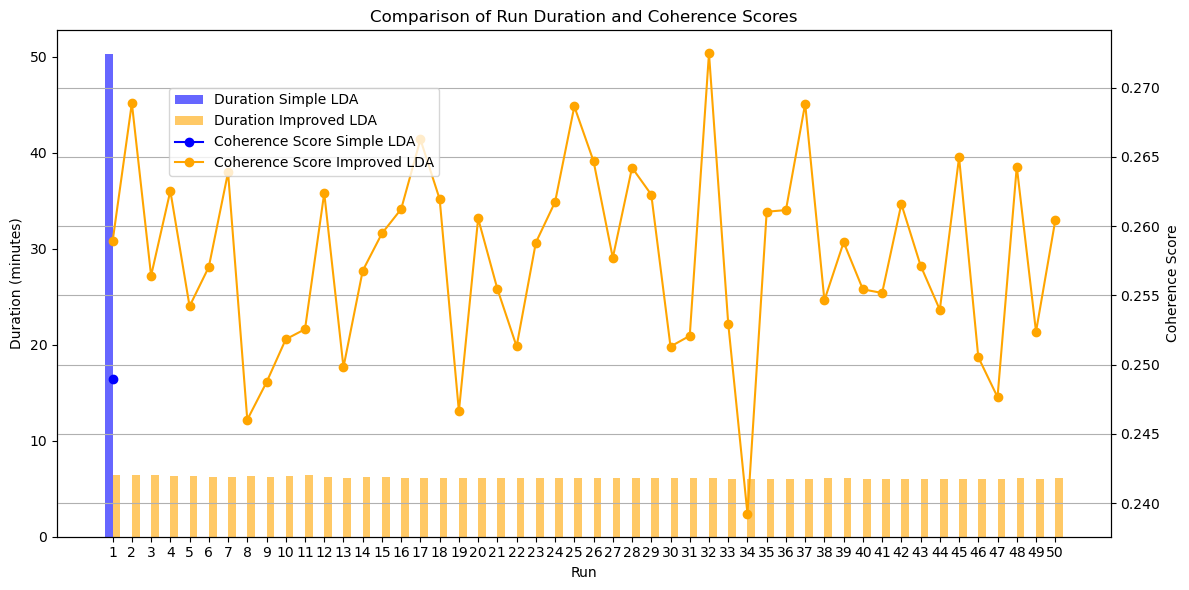

In [75]:
import matplotlib.pyplot as plt

# Plotting the run duration and coherence scores from both notebooks
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot for Duration
ax1.bar(merged_df['Run'] - 0.2, merged_df['Duration (minutes) vanilla'],
        width=0.4, label='Duration Simple LDA', color='blue', alpha=0.6)
ax1.bar(merged_df['Run'] + 0.2, merged_df['Duration (minutes) improved'],
        width=0.4, label='Duration Improved LDA', color='orange', alpha=0.6)

# Adding labels for the first y-axis
ax1.set_xlabel('Run')
ax1.set_ylabel('Duration (minutes)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a secondary y-axis for coherence scores
ax2 = ax1.twinx()
ax2.plot(merged_df['Run'], merged_df['Coherence Score vanilla'],
         marker='o', label='Coherence Score Simple LDA', color='blue')
ax2.plot(merged_df['Run'], merged_df['Coherence Score improved'],
         marker='o', label='Coherence Score Improved LDA', color='orange')

# Adding labels and title for the secondary y-axis
ax2.set_ylabel('Coherence Score', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), bbox_transform=ax1.transAxes)

# Adding title
plt.title('Comparison of Run Duration and Coherence Scores')
plt.xticks(merged_df['Run'])  # Set x-ticks to be the run numbers
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


Wie zu erwarten, gibt es einen deutlichen Unterschied bezüglich der Menge an Runs und dadurch berechneten Coherence Scores. Geschuldet der mehrmaligen Ausführung von LDAPrototype.

Interessant ist jedoch das **simple_LDA** trotz weniger *passes*=(10) und *unique_categories*=37 im Vergleich zu **improved_LDA** mit *passes*=20 und *unique_categories*=42 fast genauso lang gerechnet hat um die Kategorien zu bestimmen und dabei einen deutlich schlechteren Coherence Score erreicht hat. 

Das Ergebnis spricht für die Methode **Improved LDA**, zeigt aber gleichzeitig dass es schwierig ist mit unsupervised Topic Modeling und begrenzter Rechenkraft aussagekräftige Ergebnisse zu erzielen.

## Allgemeiner Vergleich
Im Folgenden werden die beiden implementierten Methoden hinsichtlich der bislang noch nicht evaluierten Parameter miteinander verglichen.

Der zugrunde liegende Prozess jeder Methode war im Wesentlichen ähnlich:
1. Reinigen der Daten und vorbereitung für den Trainingsschritt
2. Trainieren des LDA
3. Evaluieren des Ergebnisses und Kontextverständnis jenes


### Simple LDA
**Pros:**
* Einfach zu implementieren
* Schnelles trainieren einfacher Datasets für "gute" Ergebnisse

**Cons:**
* Fehleranfällig
* Underfitting ist ein Problem
<br>

### Improved LDA
**Pros:**
* LDA Methode in verbesserter Variante
* Aufschlussreiche Informationen im Vergleich mit *simple_lda*
* Mehr Möglichkeiten den Prozess zu verbessern


**Cons:**
* Komplex und kompliziert die Methode des Papers zu reproduzieren
* Langsame Laufzeit auf einer lokalen Maschine

Daher erübrigt sich die implementierte Lösung für "improved_lda" bei der Ausbildung eines LDA, zumindest bei korrekter Aufbereitung der Daten.

## Herausforderungen & Verbesserungen
Jeder Schritt des Prozesses impliziert eigene Herausforderungen.
1. Allgemein:
   1. Nachzuvollziehen wie der Datensatz erhoben wurde
   2. Leere Felder, zu kurze/schlechte Beschreibungen
   3. Sehr großer Datensatz, Underfitting des Modells
2. Daten Bearbeitug
   * *Simple LDA*
     * Übermäßig komplexe Kategorien mussten entfernt werden
     * Aufbereitung und Matching der Topics schwierig 
   * **Improved LDA**
     * Um der größe des Datensatzes gerecht zu werden, recht diffiziel -> Es wurde ein Mittelweg gewählt
     * Das abschließende Aufbereiten der Ergebnisse war recht komplex um den Anforderungen zu entsprechen
3. Trainieren des LDAs
   * *Simple LDA*
     * Passes und CoherenceScore nicht immer linear, Trainingszeit auf eigenem System tendenziell höher
   * **Improved LDA**
     * genaue Umsetzung der LDAPrototype Methode
     * sehr rechen und damit zeit intensiv für sowohl das training als auch das zuweisen des Prototypen
     * bearbeiten der weiteren Pipeline komplex und fehleranfällig
4. Auswerten der Ergebnisse
   * *Simple LDA*
     * Visualisierung kaum aussagekräftig, schlechtes Clustering
     * Kategorien für Menschen kaum erahnbar, zu große Varianz der Wörter
   * **Improved LDA**
     * Als direkte Ausgabe nicht aussagekräftig -> weitere bearbeitung notwendig
     * Die Ergebnisse sind abstrakt und nicht einfach zu verstehen -> weitere bearbeitung notwendig

Folgende Verbesserungen sind möglich und sinnvoll:
1. Allgemein: 
   1. Das verwenden eines kleineren (begrenzten) Datensatzes ermöglicht deutlich spezifischere, von einander abgegrenzte und informatiefere Ergebnisse (s. h. improved lda corpus small)
   2. Besseres Verständnis wie die Kategorien den Text zugewiesen werden um die Ergebnisse entsprechend "filtern" zu können
2. Daten Vorbereitung
   * *Simple LDA* __und__ 
   * **Improved LDA**
     * Mit Verständnis der LDA Funktionsweise ist es sinnvoll die Daten besser für das Training zu filtern
     * Die Daten besser zu bereinigen um mehr "unnötige" Wörter herauszufiltern
3. Trainieren des LDAs
   * *Simple LDA*
     * Leistungsstärkere Hardware
   * **Improved LDA**
     * Bessere lokale Hardware für das Training verwenden
     * die Methode LDAPrototype genauer umsetzen und somit bessere Ergebnisse erreichen
4. Auswerten der Ergebnisse
   * *Simple LDA*
     * Visualisierung, Interpretation und Exportierung verbessern
   * **Improved LDA**
     * Auswertungs Pipeline verbessern
     * verwenden interaktiver plots

### Fazit
Topic Modeling mit Latent Dirichlet Allocation ist nicht sehr effizient wenn der Datensatz groß ist. Dadurch entsteht underfitting und die ERgebnisse gleichen sich an, mit der Methode LDAPrototype (Improved LDA) ist es möglich dies rudimentär auszugleichen. Die Ergebnisse werden jedoch nicht überragend besser und kommen zulaste der Laufzeit zustande, welche durch das ausführen der größeren Menge deutlch länger wird.
Prinzipiell entstehen gute insights und Ergebnisse.

Da LLMs aktuell die Machine Learning Landschaft dominieren, scheinen sie die ideale Lösung für jegliches Problem zu sein. Die größten Modelle können dabei in Verwendung als RAG-System ähnliche Aufgaben wie LDA übernehmen. In diesem Kontext erscheint LDA aus der Zeit gefallen und hat seine Relevanz im Bereich der Textbearbeitung verloren. Ist aber als unsupervised Topic Modeling Methode für andere Anwendungsbereiche relevant, bzw. erfüllt eine Funktion im Rahmen komplexerer, größerer ML Systeme.